In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''
P0. Implement a list
'''

class LNode:
    def __init__(self,val):
        self.val = val
        self.next = None

In [3]:
# Create a function for decomposing the parameter mode

def parameter_modes(code):
    
    # Add leading zeros to make 5 digits
    c_str = '0'*(5-len(str(code)))+str(code)
    
    return [c_str[0],c_str[1],c_str[2], c_str[3:]]

In [4]:
incom0 = np.fromfile('15_input.txt',sep=",").astype(int)

incom0 = np.append(incom0, np.zeros(1000)).astype(int)

for i, value in enumerate(incom0):
    vars()['node'+str(i)]=LNode(value)

In [5]:
len(incom0)

2045

In [6]:
def intcode_call(signal_input, incom, pointer_position=0, relative_base=0, reinitialize = False):
    # Re-read input to reset intcom program
    if reinitialize == True:
        incom = np.fromfile('13_input.txt',sep=",").astype(int)
        
    for j, value in enumerate(incom):
        vars()['node'+str(j)]=LNode(value)

    mem = signal_input

    output = []
    
    rel_base = relative_base
    i = pointer_position

    while i <= len(incom):
        
        #print(i)

        # decode the parameter modes
        p_modes = parameter_modes(vars()['node'+str(i)].val)

        # build instruction

        # retrieve parameters for specific opcode
        if p_modes[-1] in ['99']:
            instr = [99]
            #print('Opcode 99 executed.')
            
            # Prepare incom for return
            incom_out = []
            for j in range(len(incom)):
                incom_out = incom_out + [vars()['node'+str(j)].val]
            #print('program complete')
            
            #output = []
            
            return output, incom_out, i, rel_base
            break
        
        elif p_modes[-1] in ['01', '02', '07', '08']:
            instr = [int(p_modes[-1])]
            for j in range(i+1, i+4):
                instr += [vars()['node'+str(j)].val]
            i += 4

        elif p_modes[-1] in ['03', '04','09']:
            instr = [int(p_modes[-1])] + [vars()['node'+str(i+1)].val]
            i += 2

        elif p_modes[-1] in ['05', '06']:
            instr = [int(p_modes[-1])]
            for j in range(i+1, i+3):
                instr += [vars()['node'+str(j)].val]
            i += 3

        else:
            print('Uh oh... intruction not understood')
            break
            
        #print(p_modes)
        #print(instr)


        # Execute instructions
        
        # ADDITION # ==========================================================================
        if instr[0] == 1:
            # define a
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # if parameter is in relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val
                
            # define b
            b = instr[2] # default is immediate mode
            if p_modes[1] == '0': # if parameter is position mode
                b = vars()['node'+str(instr[2])].val
            elif p_modes[1] == '2': # if parameter is in relative mode
                if rel_base + instr[2] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                b = vars()['node'+str(rel_base + instr[2])].val

            ab = a+b # calculate the overwrite value

            # write         
            if p_modes[0] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[0] == '2': # if parameter is in relative mode
                if rel_base + instr[3] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                vars()['node'+str(rel_base + instr[3])].val = ab
            else:
                vars()['node'+str(instr[3])].val = ab

        
        # MULTIPLICATION # =========================================================
        elif instr[0] == 2:
            # define a
            a = instr[1] # default is immediate mode
            #print('immediate mode a = ' + str(a))
            if p_modes[2] == '0': # if parameter is position mode
                #print('position mode a = ' + str(a))
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # if parameter is in relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val
                #print('relative mode a = ' + str(a))

            # define b
            b = instr[2] # default is immediate mode
            if p_modes[1] == '0': # if parameter is position mode
                b = vars()['node'+str(instr[2])].val
            elif p_modes[1] == '2': # if parameter is in relative mode
                if rel_base + instr[2] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                b = vars()['node'+str(rel_base + instr[2])].val

            ab = int(a)*int(b) # calculate the overwrite value

            # write         
            if p_modes[0] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[0] == '2': # if parameter is in relative mode
                if rel_base + instr[3] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                vars()['node'+str(rel_base + instr[3])].val = ab
            else:
                vars()['node'+str(instr[3])].val = ab

        # INPUT # =====================================================================        
        elif instr[0] == 3:
            # write input (mem)
            if p_modes[2] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                vars()['node'+str(rel_base + instr[1])].val = mem #[0]
                #mem = mem[1:]
            else:
                #print(len(mem))
                vars()['node'+str(instr[1])].val = mem #[0]
                #mem = mem[1:]
        
        
        # OUTPUT # =================================================================
        elif instr[0] == 4:
            # define a
            #print('output parameter mode: ' + str(p_modes[2]) +
            #      ', parameter: ' + str(instr[1]))
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val
                

            # write to output
            output = output + [a]
            #print('output:', output)
            if len(output) == 1:
                # Repackage the nodes as incom
                incom_out = []
                for j in range(len(incom)):
                    incom_out = incom_out + [vars()['node'+str(j)].val]

                return output, incom_out, i, rel_base

        
        # JUMP IF TRUE # ===========================================================
        elif instr[0] == 5:
            # define a
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                #print('retrieving node ' + str(instr[1]))
                a = vars()['node'+str(instr[1])].val
                #print('a is' + str(a))
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val

            # define b
            b = instr[2] # default is immediate mode
            if p_modes[1] == '0': # if parameter is position mode
                b = vars()['node'+str(instr[2])].val
            elif p_modes[1] == '2': # relative mode
                if rel_base + instr[2] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                b = vars()['node'+str(rel_base + instr[2])].val

            # write         
            if p_modes[0] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[0] == '2': # relative mode
                print("'Write' fail for jump-if-true. Check for parameter mode 2!")
                break
            else:
                #print('a is' + str(a))
                if a != 0:
                    i = b
                    
                    
        # JUMP IF FALSE # ===========================================================
        elif instr[0] == 6:
            # define a
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val

            # define b
            b = instr[2] # default is immediate mode
            if p_modes[1] == '0': # if parameter is position mode
                b = vars()['node'+str(instr[2])].val
            elif p_modes[1] == '2': # relative mode
                if rel_base + instr[2] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                b = vars()['node'+str(rel_base + instr[2])].val

            # write         
            if p_modes[0] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[0] == '2': # relative mode
                print("'Write' fail for jump-if-false. Check for parameter mode 2!")
                break
            else:
                if a == 0:
                    i = b
                    
        # LESS THAN # ==========================================================================
        elif instr[0] == 7:
            # define a
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val

            # define b
            b = instr[2] # default is immediate mode
            if p_modes[1] == '0': # if parameter is position mode
                b = vars()['node'+str(instr[2])].val
            elif p_modes[1] == '2': # relative mode
                if rel_base + instr[2] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                b = vars()['node'+str(rel_base + instr[2])].val

            # apply test
            if a < b:
                #print(str(a) + 'is less than' + str(b))
                ab = 1
            else:
                #print(str(a) + 'is NOT less than' + str(b))
                ab = 0                

            # write         
            if p_modes[0] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[0] == '2': # relative mode
                vars()['node'+str(rel_base + instr[3])].val = ab 
            else:
                #print('setting node ' + str(instr[3]) + 'to be ' + str(ab))
                vars()['node'+str(instr[3])].val = ab 

        # EQUALS # ========================================================================
        elif instr[0] == 8:
            # define a
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val

            # define b
            b = instr[2] # default is immediate mode
            if p_modes[1] == '0': # if parameter is position mode
                b = vars()['node'+str(instr[2])].val
            elif p_modes[1] == '2': # relative mode
                if rel_base + instr[2] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                b = vars()['node'+str(rel_base + instr[2])].val

            # apply test
            if a == b:
                ab = 1
            else:
                ab = 0                

            # write         
            if p_modes[0] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[0] == '2': # relative mode
                vars()['node'+str(rel_base + instr[3])].val = ab
            else:
                vars()['node'+str(instr[3])].val = ab
                
        # ADJUST RELATIVE BASE # =============================================================
        elif instr[0] == 9:
            # define a
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val
                
            # execute: adjust relative base
            if p_modes[1] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[1] == '2': # relative mode
                print("'Write' fail for jump-if-false. Check for parameter mode 2!")
                break
            else:
                rel_base += a
                #print('Relative base now:'+str(rel_base))
                

        else:
            print('Instruction not understood!')
            break

    #if i > len(incom):
    #    print('End of input code reached.')
        
    # Repackage the nodes as incom
    incom_out = []
    for j in range(len(incom)):
        incom_out = incom_out + [vars()['node'+str(j)].val]
        
    print('returning at end of intcode')

    return output, incom_out, i, rel_base

Test the intcode:



In [7]:
# intput of 1 sends the droid N
output, incom, pointer, relative_base = intcode_call(signal_input=[4], incom=incom0, pointer_position=0, relative_base=0)
print(output)


[1]


Okay, it gives something!

Let's keep track of the droid's position on a map. Say it's 100 x 100 cells and the droid will start at (50,50).

In [541]:
def bot_move(instruction):
    global bot_coord, map_maze, map_maze_dead_ends
    # if the bot moved, update the position
    if instruction == 1: # move north
        bot_coord[1] += 1
    elif instruction == 2: # move south
        bot_coord [1] -= 1
    elif instruction == 3: # move west
        bot_coord[0] -= 1
    elif instruction == 4: # move east
        bot_coord[0] += 1
    else:
        print('instruction not understood: ' + str(instruction))
        
    # update map_maze
    map_maze[bot_coord[0],bot_coord[1]] = 1
    map_maze_dead_ends[bot_coord[0],bot_coord[1]] = 1
    
def found_sensor():
    global bot_coord, map_maze, map_maze_dead_ends
    map_maze[bot_coord[0],bot_coord[1]] = 2
    map_maze_dead_ends[bot_coord[0],bot_coord[1]] = 2
        
def bot_wall(instruction):
    global bot_coord, map_maze, map_maze_dead_ends
    # if the bot found a wall, update the map_maze
    if instruction == 1: # wall north
        map_maze[bot_coord[0],bot_coord[1]+1] = 0
        map_maze_dead_ends[bot_coord[0],bot_coord[1]+1] = 0
    elif instruction == 2: # wall south
        map_maze[bot_coord[0],bot_coord[1]-1] = 0
        map_maze_dead_ends[bot_coord[0],bot_coord[1]-1] = 0
    elif instruction == 3: # wall west
        map_maze[bot_coord[0]-1,bot_coord[1]] = 0
        map_maze_dead_ends[bot_coord[0]-1,bot_coord[1]] = 0
    elif instruction == 4: # wall east
        map_maze[bot_coord[0]+1,bot_coord[1]] = 0
        map_maze_dead_ends[bot_coord[0]+1,bot_coord[1]] = 0
    else:
        print('instruction not understood: ' + str(instruction))    

In [9]:
bot_coord = [50,50]

map_maze = np.zeros((100,100))-1 # unexplored cells have value -1
map_maze[bot_coord[0],bot_coord[1]] = 1 # we know the start is not a wall

map_crumbs = np.zeros_like(map_maze) + 999999 # all distances start very high
map_crumbs[bot_coord[0],bot_coord[1]] = 0 # we know we start at 0 steps

bot_coord = [50,50]

# start with the first move:

# send bot north - we know it's a wall
output, incom, pointer, relative_base = intcode_call(signal_input=[1], incom=incom0, pointer_position=0, relative_base=0)

# update bot coordinates
# well, the instruction north gave an output of 0, so bot didn't move

# update maze map
map_maze[bot_coord[0],bot_coord[1]+1] = 0


moves = 0

while moves < 1000:
    
    instruction = np.random.randint(1,5)
    
    output, incom, pointer, relative_base = intcode_call(signal_input=[instruction], incom=incom, pointer_position=pointer, relative_base=relative_base)

    if output[0] == 1:
        bot_move(instruction)
    elif output[0] == 0:
        bot_wall(instruction)
    elif output[0] == 2:
        print('Oxygen sensor located')
        break
    else:
        print('Bot response not understood: ' + str(output[0]))
    
    moves += 1
    
    

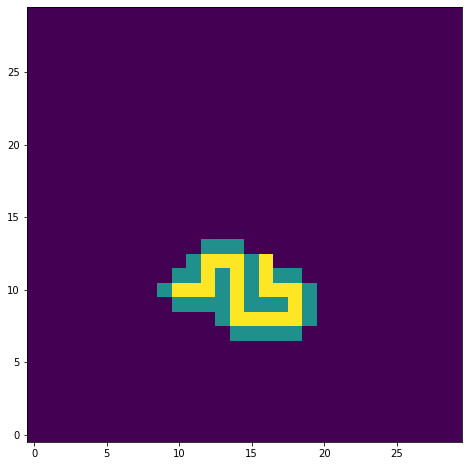

In [10]:
plt.figure(figsize=(8,8))
plt.imshow(map_maze[40:70, 40:70].T, origin='lower')

Okay, we're getting somewhere. Let's boost this random approach by providing the first number of steps to get around:

In [327]:
#maze_sol = [4,4,1,1,4,4,2,2,2,2,4,4,4,4,1,1,3,3,1,1,4,4,1,1,4,4,4,4,1,1,1,1,1,1,1,1,3,3,2,2,3,3,2,2,4,4,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,4,4,2,2,3,3,2,2,3,3,2,2,3,3,1,1,1,1,4,4,1,1,3,3,1,1,4,4,1,1,3,3]

#maze_sol = [4, 4, 1, 1, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 1, 1, 3, 3, 1, 1, 4, 4, 1, 1, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 2, 2, 3, 3, 2, 2, 4, 4, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 4, 4, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 1, 1, 1, 1, 4, 4, 1, 1, 3, 3, 1, 1, 4, 4, 1, 1, 3, 3, 1, 1, 4, 4, 4, 4, 2, 2, 4, 4, 1]

maze_sol = [4, 4, 1, 1, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 1, 1, 3, 3, 1, 1, 4, 4, 1, 1, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 2, 2, 3, 3, 2, 2, 4, 4, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 4, 4, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 1, 1, 1, 1, 4, 4, 1, 1, 3, 3, 1, 1, 4, 4, 1, 1, 3, 3, 1, 1, 4, 4, 4, 4, 2, 2, 4, 4, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 4, 4, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 1, 1, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 4, 4, 2, 2, 3, 3, 3, 3, 3]

In [232]:
bot_coord = [50,50]

map_maze = np.zeros((100,100))-1 # unexplored cells have value -1
map_maze[bot_coord[0],bot_coord[1]] = 1 # we know the start is not a wall

map_crumbs = np.zeros_like(map_maze) + 99999 # all distances start very high
map_crumbs[bot_coord[0],bot_coord[1]] = 0 # we know we start at 0 steps

bot_coord = [50,50]

# start with the first move:

# send bot north - we know it's a wall
output, incom, pointer, relative_base = intcode_call(signal_input=[1], incom=incom0, pointer_position=0, relative_base=0)

# update bot coordinates
# well, the instruction north gave an output of 0, so bot didn't move

# update maze map
map_maze[bot_coord[0],bot_coord[1]+1] = 0


# now use the first part of the solution to get things started:
for step in maze_sol:
    output, incom, pointer, relative_base = intcode_call(signal_input=[step], incom=incom, pointer_position=pointer, relative_base=relative_base)

    if output[0] == 1:
        bot_move(step)
    elif output[0] == 0:
        bot_wall(step)
    elif output[0] == 2:
        print('Oxygen sensor located')
        bot_move(step)
        break
    else:
        print('Bot response not understood: ' + str(output[0]))
        
        
# Now randomize...
moves = 0

while moves < 100:
    
    instruction = np.random.randint(1,5)
    
    output, incom, pointer, relative_base = intcode_call(signal_input=[instruction], incom=incom, pointer_position=pointer, relative_base=relative_base)

    if output[0] == 1:
        bot_move(instruction)
    elif output[0] == 0:
        bot_wall(instruction)
    elif output[0] == 2:
        print('Oxygen sensor located')
        bot_move(step)
        break
    else:
        print('Bot response not understood: ' + str(output[0]))
    
    moves += 1
            

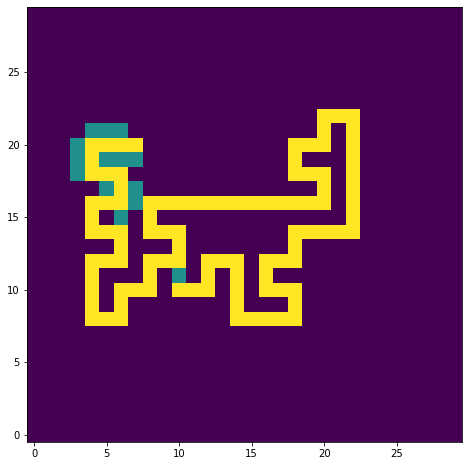

In [233]:
            
plt.figure(figsize=(8,8))
plt.imshow(map_maze[40:70,40:70].T, origin='lower')

This will take forever! I need to do things more intelligently.

Let's use this crumb map. Map values show steps from start. Let's define a function that assigns a cell a value based on the neighbour cells.

In [538]:
def leave_crumbs():
    global map_crumbs, map_maze, map_crumbs_dead_ends
    # handle path cells
    for cell in np.array(np.where(map_maze == 1)).T:
        if map_crumbs[cell[0],cell[1]] != 0:
            min_neigh = min(map_crumbs[cell[0]+1,cell[1]],map_crumbs[cell[0]-1,cell[1]],map_crumbs[cell[0],cell[1]+1],map_crumbs[cell[0],cell[1]-1])
            if min_neigh < 99999: # normal path cell
                map_crumbs[cell[0],cell[1]] = 1 + min_neigh
                
        if map_crumbs_dead_ends[cell[0],cell[1]] != 0:
            min_neigh = min(map_crumbs_dead_ends[cell[0]+1,cell[1]],map_crumbs_dead_ends[cell[0]-1,cell[1]],map_crumbs_dead_ends[cell[0],cell[1]+1],map_crumbs_dead_ends[cell[0],cell[1]-1])
            if min_neigh < 99999: # normal path cell
                map_crumbs_dead_ends[cell[0],cell[1]] = 1 + min_neigh
                
    # handle sensor cells
    for cell in np.array(np.where(map_maze == 1)).T:
        if map_crumbs[cell[0],cell[1]] != 0:
            min_neigh = min(map_crumbs[cell[0]+1,cell[1]],map_crumbs[cell[0]-1,cell[1]],map_crumbs[cell[0],cell[1]+1],map_crumbs[cell[0],cell[1]-1])
            if min_neigh < 99999: # normal path cell
                map_crumbs[cell[0],cell[1]] = 1 + min_neigh
                
        if map_crumbs_dead_ends[cell[0],cell[1]] != 0:
            min_neigh = min(map_crumbs_dead_ends[cell[0]+1,cell[1]],map_crumbs_dead_ends[cell[0]-1,cell[1]],map_crumbs_dead_ends[cell[0],cell[1]+1],map_crumbs_dead_ends[cell[0],cell[1]-1])
            if min_neigh < 99999: # normal path cell
                map_crumbs_dead_ends[cell[0],cell[1]] = 1 + min_neigh
                
    # handle wall cells
    for cell in np.array(np.where(map_maze == 0)).T:
        if map_crumbs[cell[0],cell[1]] != 999999:
            map_crumbs[cell[0],cell[1]] = 999999
        if map_crumbs_dead_ends[cell[0],cell[1]] != 999999:
            map_crumbs_dead_ends[cell[0],cell[1]] = 999999
        
                
def clean_crumbs():
    global map_crumbs, map_maze
    # Deal with dead ends...
    for cell in np.array(np.where(map_maze == 1)).T:
        if map_crumbs[cell[0],cell[1]] != 0:
            neighs = [map_crumbs[cell[0]+1,cell[1]],map_crumbs[cell[0]-1,cell[1]],map_crumbs[cell[0],cell[1]+1],map_crumbs[cell[0],cell[1]-1]]
            #print(map_crumbs[cell[0],cell[1]])
            #print(neighs)
            neighs.remove(min(neighs))
            #print(neighs)
            if sum(neighs) == 3*999999: # if a cell has three neighbouring wall cells - dead end
                map_crumbs[cell[0],cell[1]] = 999999
                map_maze[cell[0],cell[1]] = 0
                #print('Removed dead end: ' + str([cell[0],cell[1]]))
                
                
def crumb_instructions():
    global crumb_map
    instructions = []
    for crumb in range(int(max([map_crumbs[cell[0],cell[1]] for cell in np.array(np.where(map_maze == 1)).T]))):
        cell = np.array(np.where(map_crumbs == crumb)).T
        if map_crumbs[cell[0][0],cell[0][1]+1] == crumb+1: # northward
            instructions.append(1)
        if map_crumbs[cell[0][0],cell[0][1]-1] == crumb+1: # southward
            instructions.append(2)
        if map_crumbs[cell[0][0]-1,cell[0][1]] == crumb+1: # westward
            instructions.append(3)
        if map_crumbs[cell[0][0]+1,cell[0][1]] == crumb+1: # eastward
            instructions.append(4)
        
    return instructions

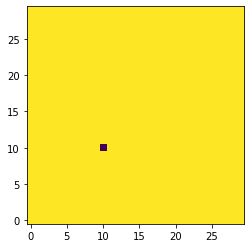

In [238]:
map_crumbs = np.zeros_like(map_maze) + 99999 # all distances start very high
map_crumbs[50,50] = 0 # we know we start at 0 steps

plt.imshow(map_crumbs[40:70,40:70].T, origin='lower')

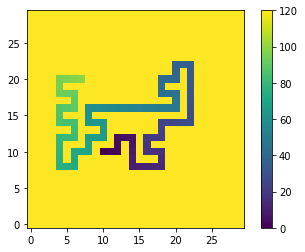

In [242]:
map_crumbs_last = np.zeros_like(map_crumbs)

while not np.all(map_crumbs == map_crumbs_last):
    
    map_crumbs_last = np.copy(map_crumbs)
    
    leave_crumbs()


map_crumbs_last = np.zeros_like(map_crumbs)

while not np.all(map_crumbs == map_crumbs_last):
    
    map_crumbs_last = np.copy(map_crumbs)
    
    clean_crumbs()

plt.imshow(map_crumbs[40:70,40:70].T, origin='lower', vmax = 120)
plt.colorbar()

Generate a set of instructions from the crumb map:

In [266]:
maze_sol = crumb_instructions()

Okay, so we provide a maze solution map, randomly wander for a while, update the crumb map, update the solution map, etc, etc.

In [423]:
bot_coord = [100,100]

map_maze = np.zeros((200,200))-1 # unexplored cells have value -1
map_maze[bot_coord[0],bot_coord[1]] = 1 # we know the start is not a wall

map_crumbs = np.zeros_like(map_maze) + 99999 # all distances start very high
map_crumbs[bot_coord[0],bot_coord[1]] = 0 # we know we start at 0 steps

for i in range(2):
    
    bot_coord = [100,100]
    
    # start with the first move:
    # send bot north - we know it's a wall
    output, incom, pointer, relative_base = intcode_call(signal_input=[1], incom=incom0, pointer_position=0, relative_base=0)

    # update bot coordinates
    # well, the instruction north gave an output of 0, so bot didn't move

    # update maze map
    map_maze[bot_coord[0],bot_coord[1]+1] = 0
    
    # now use the first part of the solution to get things started:
    for step in maze_sol:
        output, incom, pointer, relative_base = intcode_call(signal_input=[step], incom=incom, pointer_position=pointer, relative_base=relative_base)

        if output[0] == 1:
            bot_move(step)
        elif output[0] == 0:
            bot_wall(step)
        elif output[0] == 2:
            print('Oxygen sensor located')
            bot_move(step)
            found_sensor()
            break
        else:
            print('Bot response not understood: ' + str(output[0]))


    # Now randomize...
    moves = 0

    while moves < 20000:

        instruction = np.random.randint(1,5)

        output, incom, pointer, relative_base = intcode_call(signal_input=[instruction], incom=incom, pointer_position=pointer, relative_base=relative_base)

        if output[0] == 1:
            bot_move(instruction)
        elif output[0] == 0:
            bot_wall(instruction)
        elif output[0] == 2:
            print('Oxygen sensor located')
            bot_move(instruction)
            found_sensor()
            break
        else:
            print('Bot response not understood: ' + str(output[0]))

        moves += 1
        
    
    # Wandering complete. Update the crumb map
    
    # Assign crumbs
    map_crumbs_last = np.zeros_like(map_crumbs)

    while not np.all(map_crumbs == map_crumbs_last):
        map_crumbs_last = np.copy(map_crumbs)
        leave_crumbs()

    # Clip dead ends
    map_crumbs_last = np.zeros_like(map_crumbs)

    while not np.all(map_crumbs == map_crumbs_last):
        map_crumbs_last = np.copy(map_crumbs)
        clean_crumbs()
        
    # update the crumb instructions
    maze_sol = crumb_instructions()

Removed dead end: [100, 116]
Removed dead end: [106, 104]
Removed dead end: [106, 118]
Removed dead end: [99, 116]
Removed dead end: [105, 104]
Removed dead end: [105, 118]
Removed dead end: [98, 116]
Removed dead end: [104, 104]
Removed dead end: [104, 118]
Removed dead end: [98, 115]
Removed dead end: [103, 104]
Removed dead end: [103, 118]
Removed dead end: [98, 114]
Removed dead end: [102, 104]
Removed dead end: [98, 113]
Removed dead end: [101, 104]
Removed dead end: [98, 112]
Removed dead end: [97, 112]
Oxygen sensor located
Removed dead end: [82, 114]
Removed dead end: [82, 120]
Removed dead end: [83, 114]
Removed dead end: [84, 110]
Removed dead end: [85, 110]
Removed dead end: [86, 110]
Removed dead end: [86, 111]
Removed dead end: [86, 112]
Removed dead end: [86, 113]
Removed dead end: [88, 102]
Removed dead end: [92, 104]
Removed dead end: [100, 116]
Removed dead end: [106, 118]
Removed dead end: [81, 120]
Removed dead end: [87, 102]
Removed dead end: [92, 103]
Removed dead 

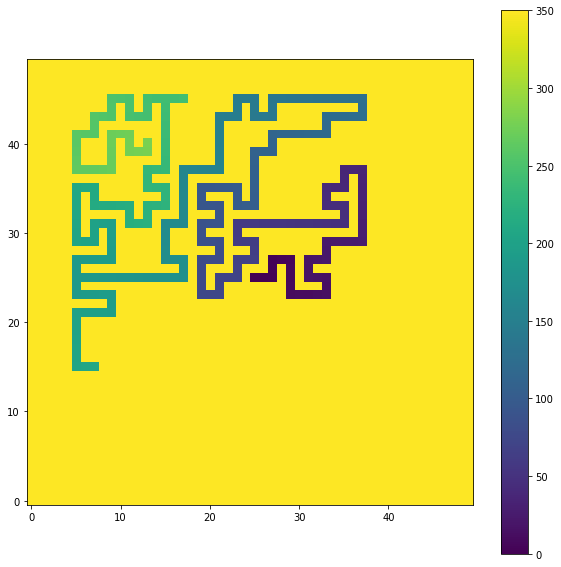

In [446]:
plt.figure(figsize=(10,10))
plt.imshow(map_crumbs[75:125,75:125].T, origin='lower', vmax = 350)
plt.colorbar()

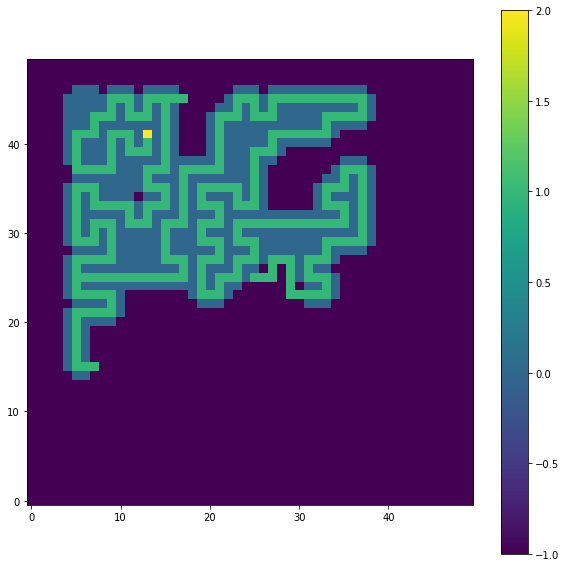

In [447]:
plt.figure(figsize=(10,10))
plt.imshow(map_maze[75:125, 75:125].T, origin='lower')
plt.colorbar()

Cool! The sensor was found. Let's find the crumb number for that cell:

In [449]:
cell = np.array(np.where(map_maze == 2)).T

map_crumbs[cell[0][0],cell[0][1]-1] # had to go one cell south since the sensor wasn't assigned a crumb value!

279.0

Part Two!

In [450]:
o2_coord = np.array(np.where(map_maze == 2)).T[0]
o2_coord

array([ 88, 116], dtype=int64)

Crap, well now we need to maintain all the dead ends too.

In [494]:
bot_coord = [100,100]
map_crumbs_dead_ends = np.zeros_like(map_maze) + 99999 # all distances start very high
map_crumbs_dead_ends[bot_coord[0],bot_coord[1]] = 0 # we know we start at 0 steps

map_maze_dead_ends = np.zeros((200,200))-1 # unexplored cells have value -1
map_maze_dead_ends[bot_coord[0],bot_coord[1]] = 1 # we know the start is not a wall

In [560]:
bot_coord = [100,100]

#maze_full = [4,4,1,1,4,4,2,2,2,2,4,4,4,4,1,1,3,3,1,1,4,4,1,1,4,4,4,4]#,1,1,1,1,1,1,1,1,3,3,2,2,3,3,2,2,4,4,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,4,4,2,2,3,3,2,2,3,3,2,2,3,3,1,1,1,1,4,4,1,1,3,3,1,1,4,4,1,1,3,3]
#maze_full = [4, 4, 1, 1, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 1, 1, 3, 3, 1, 1, 4, 4, 1, 1, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 2, 2, 3, 3, 2, 2, 4, 4, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 4, 4, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 1, 1, 1, 1, 4, 4, 1, 1, 3, 3, 1, 1, 4, 4, 1, 1, 3, 3, 1, 1, 4, 4, 4, 4, 2, 2, 4, 4, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 4, 4, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 1, 1, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 4, 4, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 2, 4, 4, 4, 4, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4]

map_maze = np.zeros((200,200))-1 # unexplored cells have value -1
map_maze[bot_coord[0],bot_coord[1]] = 1 # we know the start is not a wall

map_crumbs = np.zeros_like(map_maze) + 99999 # all distances start very high
map_crumbs[bot_coord[0],bot_coord[1]] = 0 # we know we start at 0 steps



for i in range(1):
    
    bot_coord = [100,100]
    
    # start with the first move:
    # send bot north - we know it's a wall
    output, incom, pointer, relative_base = intcode_call(signal_input=[1], incom=incom0, pointer_position=0, relative_base=0)

    # update bot coordinates
    # well, the instruction north gave an output of 0, so bot didn't move

    # update maze map
    map_maze[bot_coord[0],bot_coord[1]+1] = 0
    
    # now use the first part of the solution to get things started:
    for step in maze_full:
        output, incom, pointer, relative_base = intcode_call(signal_input=[step], incom=incom, pointer_position=pointer, relative_base=relative_base)

        if output[0] == 1:
            bot_move(step)
        elif output[0] == 0:
            bot_wall(step)
        elif output[0] == 2:
            print('Oxygen sensor located')
            bot_move(step)
            #found_sensor()
            #break
        else:
            print('Bot response not understood: ' + str(output[0]))


    # Now randomize...
    moves = 0

    while moves < 10000:

        instruction = np.random.randint(1,5)

        output, incom, pointer, relative_base = intcode_call(signal_input=[instruction], incom=incom, pointer_position=pointer, relative_base=relative_base)

        if output[0] == 1:
            bot_move(instruction)
        elif output[0] == 0:
            bot_wall(instruction)
        elif output[0] == 2:
            print('Oxygen sensor located')
            #bot_move(instruction)
            #found_sensor()
            #break
        else:
            print('Bot response not understood: ' + str(output[0]))

        moves += 1
        
    
    # Wandering complete. Update the crumb map
    
    # Assign crumbs
    map_crumbs_last = np.zeros_like(map_crumbs)
    map_crumbs_dead_ends_last = np.zeros_like(map_crumbs)

    while not (np.all(map_crumbs == map_crumbs_last) and (np.all(map_crumbs_dead_ends == map_crumbs_dead_ends_last))):
        map_crumbs_last = np.copy(map_crumbs)
        map_crumbs_dead_ends_last = np.copy(map_crumbs_dead_ends)
        leave_crumbs()

    # Clip dead ends
    map_crumbs_last = np.zeros_like(map_crumbs)

    while not np.all(map_crumbs == map_crumbs_last):
        map_crumbs_last = np.copy(map_crumbs)
        clean_crumbs()
        
    # update the crumb instructions
    #maze_sol = crumb_instructions()



map_crumbs_dead_ends[o2_coord[0],o2_coord[1]] = 280 
map_maze_dead_ends[o2_coord[0],o2_coord[1]] = 2
map_crumbs[o2_coord[0],o2_coord[1]] = 280

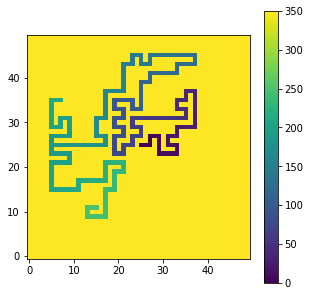

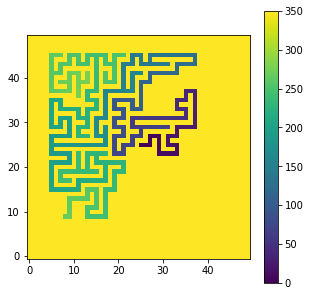

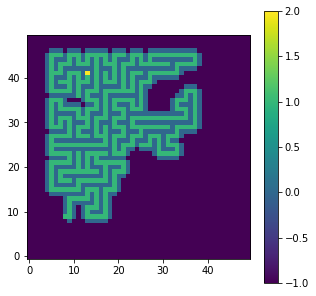

In [561]:
plt.figure(figsize=(5,5))
plt.imshow(map_crumbs[75:125,75:125].T, origin='lower', vmax = 350)
plt.colorbar()

plt.figure(figsize=(5,5))
plt.imshow(map_crumbs_dead_ends[75:125, 75:125].T, origin='lower', vmax = 350)
plt.colorbar()

plt.figure(figsize=(5,5))
plt.imshow(map_maze_dead_ends[75:125, 75:125].T, origin='lower')
plt.colorbar()

In [559]:
maze_full = crumb_instructions()#[:250]

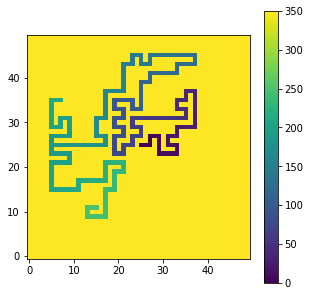

In [565]:


plt.figure(figsize=(5,5))
plt.imshow(map_crumbs[75:125, 75:125].T, origin='lower', vmax = 350)
plt.colorbar()

In [545]:
cell = np.array(np.where(map_crumbs == 279)).T
cell

array([[ 86, 111],
       [ 88, 115]], dtype=int64)

In [566]:
print(maze_full)

[4, 4, 1, 1, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 1, 1, 3, 3, 1, 1, 4, 4, 1, 1, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 2, 2, 3, 3, 2, 2, 4, 4, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 4, 4, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 1, 1, 1, 1, 4, 4, 1, 1, 3, 3, 1, 1, 4, 4, 1, 1, 3, 3, 1, 1, 4, 4, 4, 4, 2, 2, 4, 4, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 4, 4, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 1, 1, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 4, 4, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 2, 4, 4, 4, 4, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4]
